### Import libs from packages

In [1]:
import pandas as pd
from med.room.processors.class_principal import CallMethods
from med.room.processors.data_views import DataVisualizer
from med.room.processors.transform_data import NedRoomClean
from med.room.utils import logger

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

### Creating DataFrame

In [ ]:
dados = {'indices_id': ['0','1','2','3'],
         'Frase original': ['Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?',
                           'Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?',
                           'Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?',
                           'Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?'],
         'Frases comparativas': ['De acordo com a escala de dor ali na parede', 
                                'qual valor você acha que mais representa a sua dor?',
                                'De 0 a 10, qual o nível de intensidade da sua dor atualmente?',
                                'Qual a intensidade da sua dor?'],
         }

In [ ]:
dataset = pd.DataFrame(dados)

In [ ]:
dataset

In [ ]:
dataset.shape

### Save DataSet in Lake

In [ ]:
filename = 'dados_frases'
df = NedRoomClean.save_file(dataset, filename)

### Declare Variables

In [3]:
filename = 'dados_frases'
column_text = ['Frase original', 'Frases comparativas']
additional_stop_words = ['bom', 'dia', 'ola', 'eu']
especifc_word_similar = 'dor'
title_of_plot_first = 'Similar words from text'
list_of_relationship_positive = ["acordo", "melhor"]
list_of_relationship_negative = ['dor', 'intensidade']

### Building Process

In [4]:
dataset, model_similar, matrix_words, dataframe_matrix, model, embeddings_en_2d, print_info, similar, word_clusters = CallMethods.call_processors(filename=filename,
                                                                                column_text=column_text,
                                                                                additional_stop_words=additional_stop_words,
                                                                                especifc_word_similar=especifc_word_similar,
                                                                                list_of_relationship_positive=list_of_relationship_positive,
                                                                                list_of_relationship_negative=list_of_relationship_negative)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f39e8220550>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


[03/11 23:22:15] - [Info]:  Start Process to Similary Words
[03/11 23:22:15] - [Info]:  Load DataFrame
[03/11 23:22:15] - [Info]:  load csf file
[03/11 23:22:15] - [Info]:  Finishing Process
[03/11 23:22:15] - [Debug]:  Numbers of columns and Rows (4, 3)
[03/11 23:22:15] - [Debug]:  Columns Name Index(['indices_id', 'Frase original', 'Frases comparativas'], dtype='object')
[03/11 23:22:15] - [Info]:  Start Process to Transform Data
[03/11 23:22:15] - [Debug]:  column created: 
 0    olhando escala parede valor indicaria melhor dor hoje
1    olhando escala parede valor indicaria melhor dor hoje
2    olhando escala parede valor indicaria melhor dor hoje
3    olhando escala parede valor indicaria melhor dor hoje
Name: Frase original_clean, dtype: object
[03/11 23:22:15] - [Debug]:  column created: 
 0        acordo escala dor ali parede
1      valor voce acha representa dor
2    nivel intensidade dor atualmente
3                     intensidade dor
Name: Frases comparativas_clean, dtype: 

### Visualize Results

In [5]:
# dataframe construido
dataset

,indices_id,Frase original,Frases comparativas,Frase original_clean,Frases comparativas_clean,Frase original_token,Frases comparativas_token,concatenado
0,0,"Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?",De acordo com a escala de dor ali na parede,olhando escala parede valor indicaria melhor dor hoje,acordo escala dor ali parede,"[olhando, escala, parede, valor, indicaria, melhor, dor, hoje]","[acordo, escala, dor, ali, parede]","[olhando, escala, parede, valor, indicaria, melhor, dor, hoje, acordo, escala, dor, ali, parede]"
1,1,"Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?",qual valor você acha que mais representa a sua dor?,olhando escala parede valor indicaria melhor dor hoje,valor voce acha representa dor,"[olhando, escala, parede, valor, indicaria, melhor, dor, hoje]","[valor, voce, acha, representa, dor]","[olhando, escala, parede, valor, indicaria, melhor, dor, hoje, valor, voce, acha, representa, dor]"
2,2,"Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?","De 0 a 10, qual o nível de intensidade da sua dor atualmente?",olhando escala parede valor indicaria melhor dor hoje,nivel intensidade dor atualmente,"[olhando, escala, parede, valor, indicaria, melhor, dor, hoje]","[nivel, intensidade, dor, atualmente]","[olhando, escala, parede, valor, indicaria, melhor, dor, hoje, nivel, intensidade, dor, atualmente]"
3,3,"Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?",Qual a intensidade da sua dor?,olhando escala parede valor indicaria melhor dor hoje,intensidade dor,"[olhando, escala, parede, valor, indicaria, melhor, dor, hoje]","[intensidade, dor]","[olhando, escala, parede, valor, indicaria, melhor, dor, hoje, intensidade, dor]"


In [6]:
# lista de palavras de todo dataset
matrix_words

['olhando',
 'escala',
 'parede',
 'valor',
 'indicaria',
 'melhor',
 'dor',
 'hoje',
 'acordo',
 'ali',
 'voce',
 'acha',
 'representa',
 'nivel',
 'intensidade',
 'atualmente']

In [7]:
# matrix de score entre todas as palavras cruzadas do dataset
dataframe_matrix

,olhando,escala,parede,valor,indicaria,melhor,dor,hoje,acordo,ali,voce,acha,representa,nivel,intensidade,atualmente
olhando,1.000000,0.187970,0.015682,-0.121192,0.046579,0.000423,0.112730,0.248999,0.082314,-0.163138,-0.092269,0.145582,-0.064886,0.050647,-0.080681,0.038144
escala,0.187970,1.000000,0.056639,-0.130944,-0.153007,0.194302,0.053976,-0.020669,-0.100681,-0.110641,0.181463,-0.015878,-0.044647,0.089691,0.022218,-0.127250
parede,0.015682,0.056639,1.000000,0.142087,-0.090015,0.089437,0.076177,-0.051863,0.095029,0.050223,-0.016986,0.119523,0.051068,0.113488,-0.272698,-0.115845
valor,-0.121192,-0.130944,0.142087,1.000000,0.041384,0.009618,0.024812,0.004799,0.079418,0.018978,0.150839,0.228369,-0.078530,0.104757,-0.101101,-0.161087
indicaria,0.046579,-0.153007,-0.090015,0.041384,1.000000,-0.013674,0.037832,0.089787,0.076153,-0.095066,0.093960,0.024348,-0.006844,0.061167,0.079130,0.065262
melhor,0.000423,0.194302,0.089437,0.009618,-0.013674,1.000000,0.146284,0.063799,-0.137308,0.048658,0.093010,0.058612,-0.039072,0.107121,-0.135780,0.056592
dor,0.112730,0.053976,0.076177,0.024812,0.037832,0.146284,1.000000,0.030231,0.172835,-0.079344,-0.070640,-0.086073,-0.014412,0.039498,-0.124763,-0.156174
hoje,0.248999,-0.020669,-0.051863,0.004799,0.089787,0.063799,0.030231,1.000000,-0.062695,-0.085915,-0.124989,0.180321,-0.020136,0.101232,-0.013326,0.038512
acordo,0.082314,-0.100681,0.095029,0.079418,0.076153,-0.137308,0.172835,-0.062695,1.000000,0.007635,-0.060913,-0.022350,-0.115212,0.090874,-0.146562,0.090525
ali,-0.163138,-0.110641,0.050223,0.018978,-0.095066,0.048658,-0.079344,-0.085915,0.007635,1.000000,0.060054,-0.188686,0.018496,0.122297,-0.176024,0.004658


In [8]:
# modelo word2Vec treinado
model

In [9]:
# matrix construida a partir da lista de palavras matrix_words que é todo o contexto do dataset
embeddings_en_2d

array([[[ 1592.4894  ,  -573.91614 ],
        [ -316.9275  ,   113.97284 ],
        [  465.3276  , -2506.993   ],
        [  281.70438 ,  -971.0562  ],
        [ -821.02637 ,  -618.89465 ],
        [-2553.1492  , -1690.3386  ],
        [ 2476.776   ,   116.174736],
        [  583.0076  ,  1171.3228  ],
        [-1434.0964  , -2020.1416  ],
        [ -856.87787 ,  1134.9926  ],
        [  500.0954  ,  2264.4136  ],
        [ 1899.7091  ,  1556.7418  ],
        [-1034.805   ,  2265.4316  ],
        [-2316.315   ,  -594.0322  ],
        [-2134.0596  ,  1138.4462  ]],

       [[ -456.92313 ,  1140.2687  ],
        [ 1805.7578  , -1643.0486  ],
        [-1034.805   ,  2265.4316  ],
        [-1306.9606  ,   173.40103 ],
        [-1434.0964  , -2020.1416  ],
        [  512.9782  , -1291.5326  ],
        [ 1899.7091  ,  1556.7418  ],
        [   65.28025 , -2437.4185  ],
        [ 1304.7751  ,  -295.8141  ],
        [  500.0954  ,  2264.4136  ],
        [ -773.3747  , -1009.5025  ],
        [-

In [10]:
#relacionamento de palavras positivas e negativas a partir da variavel: 
# list_of_relationship_positive e list_of_relationship_negative
print_info

[('parede', 0.20654930174350739),
 ('ali', 0.1689644455909729),
 ('acha', 0.14607182145118713),
 ('nivel', 0.13520969450473785),
 ('atualmente', 0.1272037774324417),
 ('valor', 0.08962956070899963),
 ('voce', 0.03222168982028961),
 ('olhando', 0.02747994102537632),
 ('escala', 0.009447559714317322),
 ('hoje', -0.008566576987504959)]

In [11]:
# lista de palavras relacionada a variavel especifc_word_similar + score das palavras (pode ser qualquer outra que tenha no vocabulario)
similar

[('acordo', 0.17),
 ('melhor', 0.15),
 ('olhando', 0.11),
 ('parede', 0.08),
 ('escala', 0.05),
 ('nivel', 0.04),
 ('indicaria', 0.04),
 ('hoje', 0.03),
 ('valor', 0.02),
 ('representa', -0.01)]

In [12]:
# mapa de palavras similares para construcao do plot grafico
word_clusters

[['hoje',
  'escala',
  'acha',
  'dor',
  'acordo',
  'nivel',
  'indicaria',
  'atualmente',
  'parede',
  'melhor',
  'representa',
  'intensidade',
  'voce',
  'valor',
  'ali'],
 ['melhor',
  'olhando',
  'voce',
  'nivel',
  'parede',
  'dor',
  'intensidade',
  'acha',
  'hoje',
  'representa',
  'acordo',
  'ali',
  'atualmente',
  'valor',
  'indicaria'],
 ['valor',
  'acha',
  'nivel',
  'acordo',
  'melhor',
  'dor',
  'escala',
  'representa',
  'ali',
  'olhando',
  'voce',
  'hoje',
  'indicaria',
  'atualmente',
  'intensidade'],
 ['acha',
  'voce',
  'parede',
  'nivel',
  'acordo',
  'indicaria',
  'dor',
  'ali',
  'melhor',
  'hoje',
  'representa',
  'intensidade',
  'olhando',
  'escala',
  'atualmente'],
 ['voce',
  'hoje',
  'intensidade',
  'acordo',
  'atualmente',
  'nivel',
  'olhando',
  'valor',
  'dor',
  'acha',
  'representa',
  'melhor',
  'parede',
  'ali',
  'escala'],
 ['escala',
  'dor',
  'nivel',
  'voce',
  'parede',
  'hoje',
  'acha',
  'atualm

### Plot Graph Views

### plot de mapa de palavras e suas similariedades

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

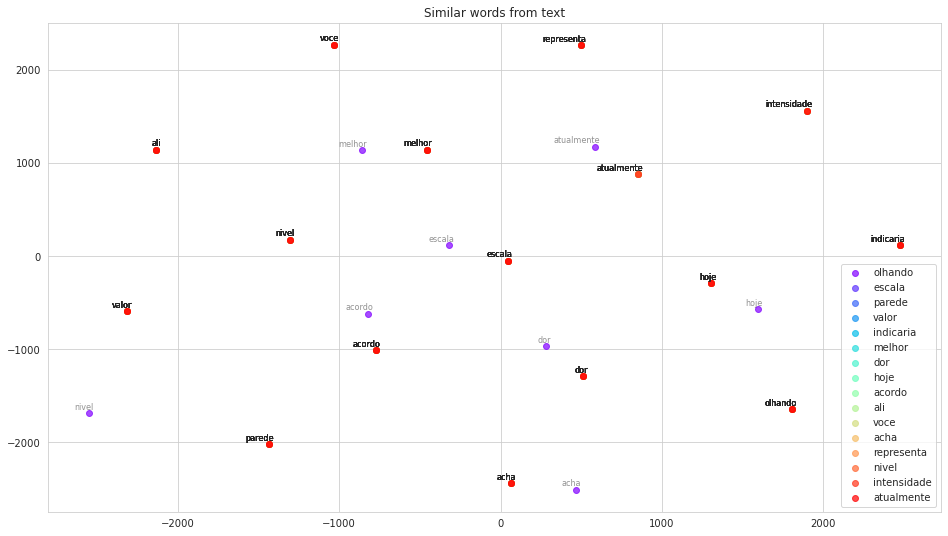

In [13]:
DataVisualizer.tsne_plot_similar_words(title_of_plot_first, matrix_words, embeddings_en_2d, word_clusters, 0.7, 'similar_words.png')

### Mapa de palavras e seu grau de relacionamento

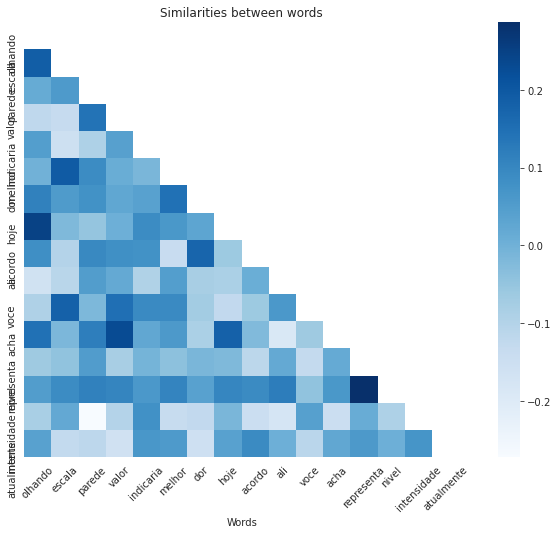

In [14]:
DataVisualizer.plo_similar_between_words(dataframe_matrix)

### Mapa dimensional de palavras similares

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f39e8220550>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
/opt/med_room/med/room/processors/data_views.py:100: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the

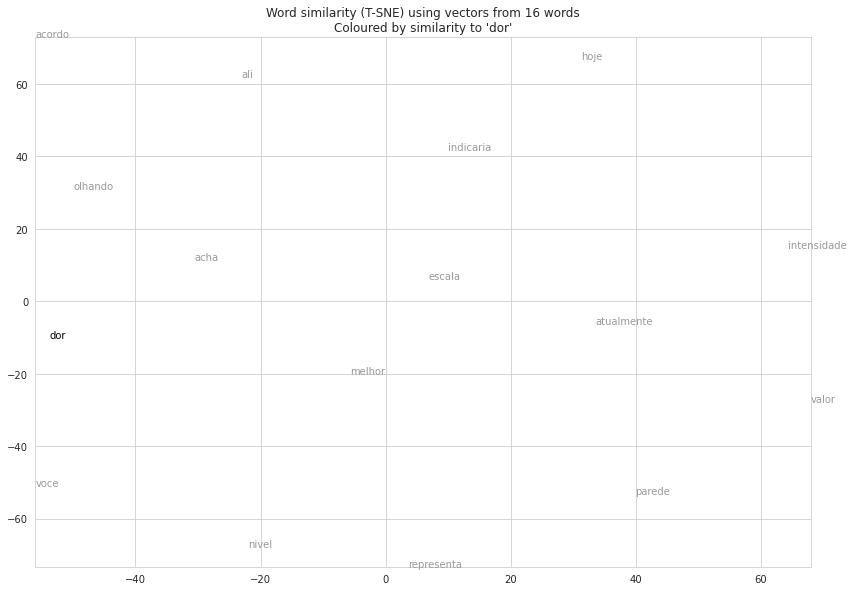

In [15]:
DataVisualizer.dimensional_vector_words(model, matrix_words, especifc_word_similar)